# Problem: You have been assigned the task of identifying potential donors for BlueRoots, a group focused on electing Democrats down-ballot, which is based in a swing state. Luckily, BlueRoots already has some data from its own list of members, with additional columns appended from commercial and other external sources. Your overall task is to load the data, clean it, impute missing values, and figure out how you would build a model of potential donors who can be targeted by the fundraising team.

 

Question 1: As a first step, write code to load the data from gp_test_data.csv into your working environment.
● Write some code to examine the data for any issues that might make analysis difficult. Don’t try to fix anything now, just look. Briefly describe any issues you find in a document file saved as GPTest_LASTNAME, with the appropriate file extension (.docx, .pdf, etc.). You will continue to use this document for additional questions.

In [2]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.1-cp37-none-any.whl size=10629 sha256=4c2390a0cc6cde37c65ce6207603d4255f32879406345552ddb94ab41d0e78f5
  Stored in directory: /root/.cache/pip/wheels/9d/93/b1/92742aa428b2a83dd6aa6ece18a908f7e38c15895b1c37a462
Successfully built empiricaldist


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from empiricaldist import Cdf



**1. Open to Access File and Libraries**

In [4]:
#Upload Grow Progress file and mount Google Drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Open Grow Progress file to review
#Use Pandas to read data, explore for missing values, and manipulate for feature analysis supporting a model
potential_donors = pd.read_csv('/content/gp_test_data.csv')
potential_donors

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,101,Rural,NaN,M,0.0,0.0,NaN,5370,6.0,90000.0,NaN,19.3,51.6,5.0,7.0,49.8,0,NaN
1,102,Suburban,1946.0,F,1.0,1.0,NaN,5151,10.0,44000.0,1.0,69.4,91.8,8.0,5.0,2.4,1,15.0
2,103,Suburban,1995.0,NaN,1.0,NaN,NaN,4144,NaN,NaN,1.0,73.0,47.4,NaN,NaN,47.3,0,NaN
3,104,Suburban,1979.0,NaN,1.0,1.0,NaN,4440,8.0,62000.0,1.0,29.3,88.2,1.0,7.0,98.1,1,63.0
4,105,Suburban,1947.0,NaN,0.0,1.0,NaN,5064,NaN,47000.0,1.0,41.0,73.4,9.0,NaN,75.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20096,Suburban,1942.0,M,1.0,1.0,NaN,4310,10.0,27000.0,1.0,10.3,22.4,10.0,2.0,67.9,0,NaN
19996,20097,Suburban,1981.0,M,1.0,1.0,NaN,5152,9.0,53000.0,1.0,15.1,2.2,3.0,4.0,20.0,0,NaN
19997,20098,Rural,1917.0,F,0.0,1.0,NaN,3758,NaN,11000.0,1.0,23.8,1.6,11.0,1.0,78.9,0,NaN
19998,20099,Rural,1958.0,F,0.0,NaN,NaN,4440,NaN,NaN,1.0,31.4,38.6,NaN,NaN,39.5,0,NaN


In [16]:
len(potential_donors)

20000

2**. Exploratory Data Analysis**
Count the number of people who have a modeled partisan score above 80 (meaning they are at least 80% likely to support Democratic candidates) and a modeled turnout score above 70 (meaning they are at least 70% likely to vote in the 2018 midterm election

In [6]:
# Note the data types for each coolumn for the 17 variables included
potential_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   voterID                     20000 non-null  int64  
 1   Urbanicity                  19997 non-null  object 
 2   Date_of_birth               15203 non-null  float64
 3   Gender                      15382 non-null  object 
 4   Married                     19793 non-null  float64
 5   Homeowner                   11561 non-null  float64
 6   Has_children                1141 non-null   float64
 7   Zipcode                     20000 non-null  object 
 8   Modeled_charitable_giving   13549 non-null  float64
 9   Household_income            16913 non-null  float64
 10  Unaffiliated_voter          15218 non-null  float64
 11  Modeled_activist_score      19591 non-null  float64
 12  Modeled_turnout_score       20000 non-null  float64
 13  Discretionary_income_level  169

In [15]:
potential_donors.columns

Index(['voterID', 'Urbanicity', 'Date_of_birth', 'Gender', 'Married',
       'Homeowner', 'Has_children', 'Zipcode', 'Modeled_charitable_giving',
       'Household_income', 'Unaffiliated_voter', 'Modeled_activist_score',
       'Modeled_turnout_score', 'Discretionary_income_level', 'Nonsaver_level',
       'Modeled_partisan_score', 'Survey_Respondent',
       'Liberal_cause_donation'],
      dtype='object')

Observations: String variables include: (1) 'Urbanicity', (2) 'Gender', which will be categorical, and (3) Zipcode, which could be converted to a numeric type or recategorized to serve as an ordinal variable if we want to derive state/location information and regroup. 

Our target variable will be 'Liberal_cause_donation',  a scoring column for propensity to donate, according to Question 3.

In [9]:
#Run a Value Counts on 'potential_donors' to highlight some descriptive statistics regarding counts per column
potential_donors.value_counts()

voterID  Urbanicity  Date_of_birth  Gender  Married  Homeowner  Has_children  Zipcode  Modeled_charitable_giving  Household_income  Unaffiliated_voter  Modeled_activist_score  Modeled_turnout_score  Discretionary_income_level  Nonsaver_level  Modeled_partisan_score  Survey_Respondent  Liberal_cause_donation
5037     Suburban    1961.0         F       0.0      1.0        1.0           5011     9.0                        39000.0           1.0                 70.0                    93.7                   6.0                         5.0             97.6                    1                  33.0                      1
1791     Suburban    1956.0         M       1.0      1.0        1.0           5011     7.0                        74000.0           1.0                 54.0                    84.9                   5.0                         8.0             7.4                     1                  36.0                      1
2083     Rural       1959.0         M       1.0      1.0       

In [7]:
#Identify the size of potential donors and their demographic info using describe method on 'potential_donors' to highlight some descriptive statistics regarding counts per column
potential_donors.describe()

,voterID,Date_of_birth,Married,Homeowner,Has_children,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
count,20000.000000,15203.000000,19793.000000,11561.000000,1141.0,13549.000000,1.691300e+04,15218.0,19591.000000,20000.00000,16913.00000,14377.000000,20000.000000,20000.000000,3098.000000
mean,10100.500000,1967.944616,0.415248,0.891013,1.0,6.845376,6.418838e+04,1.0,38.211373,56.24909,6.49258,5.476664,54.503425,0.154900,55.851517
std,5773.647028,18.556398,0.492777,0.311637,0.0,2.658846,4.903734e+04,0.0,20.599557,28.25587,3.21626,2.626865,34.120779,0.361818,30.590168
min,101.000000,1903.000000,0.000000,0.000000,1.0,1.000000,5.000000e+03,1.0,6.200000,0.20000,1.00000,1.000000,0.200000,0.000000,1.000000
25%,5100.750000,1954.000000,0.000000,1.000000,1.0,5.000000,4.200000e+04,1.0,21.200000,36.80000,4.00000,3.000000,23.500000,0.000000,29.000000
50%,10100.500000,1968.000000,0.000000,1.000000,1.0,7.000000,5.900000e+04,1.0,33.300000,52.10000,6.00000,5.000000,58.300000,0.000000,56.000000
75%,15100.250000,1984.000000,1.000000,1.000000,1.0,9.000000,7.800000e+04,1.0,53.000000,84.60000,9.00000,8.000000,87.800000,0.000000,84.000000
max,20100.000000,2002.000000,1.000000,1.000000,1.0,10.000000,1.997000e+06,1.0,92.500000,98.60000,11.00000,10.000000,99.500000,1.000000,100.000000


Observations: Based on the count, we see that we havae 20K potential donors. Age-wise: the youngest donor was born in 2002. The oldest donor was born in 1903. The median age of our potential donors is: 53 (born in 1968). 

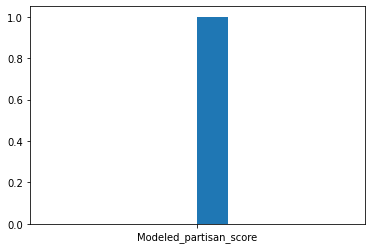

In [17]:
#Find voters who earned: 'Modeled_partisan_score' of >80%  AND 'Modeled_turnout_score' of > 70%
#Use Cummulative Distribution Function to represent all between 81% and 100% score
##Sort by partisan score by using sort_values, ascending=True

plt.hist('Modeled_partisan_score')

# Show histogram
plt.show()


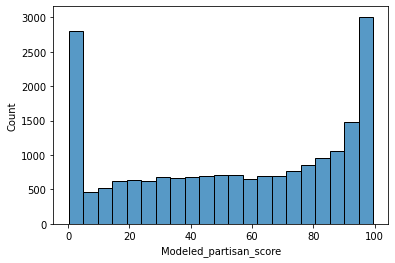

In [24]:
# Show univariate counts across 2 target scores ~stat{“count”, “frequency”, “density”, “probability”} 
#Aggregate statistic to compute in each bin. And count shows the number of observation Make sure partisan score is along the x-axis Specify 'Modeled_turnout_score' as the column to create individual graphics for

sns.histplot(data=potential_donors, x="Modeled_partisan_score")
plt.show()

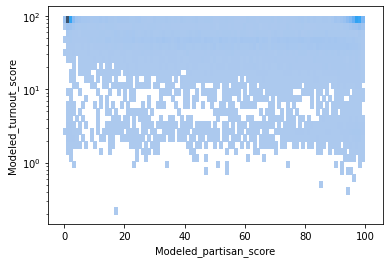

In [25]:
sns.histplot(data=potential_donors, x="Modeled_partisan_score", y="Modeled_turnout_score",
    bins=30, discrete=(True, False), log_scale=(False, True),)


In [27]:
score_more_80_partisan = potential_donors[potential_donors["Modeled_partisan_score"] > 80]
score_more_80_partisan

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
3,104,Suburban,1979.0,NaN,1.0,1.0,NaN,4440,8.0,62000.0,1.0,29.3,88.2,1.0,7.0,98.1,1,63.0
6,107,Urban,1958.0,M,0.0,1.0,NaN,3216,3.0,115000.0,1.0,77.4,83.0,2.0,10.0,98.2,1,32.0
8,109,Suburban,1979.0,NaN,0.0,NaN,NaN,3611,NaN,NaN,1.0,54.8,58.7,NaN,NaN,85.6,0,NaN
9,110,Urban,1970.0,M,1.0,NaN,NaN,3628,NaN,61000.0,1.0,52.0,90.9,7.0,NaN,91.9,0,NaN
13,114,Urban,1965.0,F,0.0,1.0,NaN,3234,4.0,101000.0,1.0,28.8,87.6,5.0,9.0,97.5,1,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,20090,Suburban,1982.0,NaN,1.0,NaN,NaN,4440,NaN,46000.0,1.0,19.6,18.2,11.0,NaN,95.3,0,NaN
19992,20093,Urban,1958.0,F,0.0,1.0,NaN,5401,3.0,56000.0,1.0,71.4,80.0,8.0,5.0,98.0,0,NaN
19993,20094,Suburban,1984.0,M,1.0,1.0,NaN,4511,9.0,66000.0,1.0,21.9,25.0,5.0,3.0,89.3,0,NaN
19994,20095,Urban,1938.0,F,0.0,1.0,1.0,3223,5.0,66000.0,1.0,70.4,85.7,9.0,5.0,98.8,0,NaN


Analyst Note: We have 6,598 potential donors who score more than 80% in 'Modeled_partisan_score'. Let's filter this further down by those having 'Modeled_turnout_score' of >= 70%.

In [28]:
score_more_80_partisan_70_turn = score_more_80_partisan[score_more_80_partisan['Modeled_turnout_score']>70]
score_more_80_partisan_70_turn

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
3,104,Suburban,1979.0,NaN,1.0,1.0,NaN,4440,8.0,62000.0,1.0,29.3,88.2,1.0,7.0,98.1,1,63.0
6,107,Urban,1958.0,M,0.0,1.0,NaN,3216,3.0,115000.0,1.0,77.4,83.0,2.0,10.0,98.2,1,32.0
9,110,Urban,1970.0,M,1.0,NaN,NaN,3628,NaN,61000.0,1.0,52.0,90.9,7.0,NaN,91.9,0,NaN
13,114,Urban,1965.0,F,0.0,1.0,NaN,3234,4.0,101000.0,1.0,28.8,87.6,5.0,9.0,97.5,1,69.0
19,120,Urban,1957.0,F,0.0,1.0,NaN,3212,5.0,84000.0,1.0,84.5,96.7,1.0,10.0,98.8,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,20076,Suburban,1961.0,F,1.0,1.0,NaN,3069,6.0,79000.0,1.0,65.1,93.6,1.0,8.0,97.2,0,NaN
19986,20087,Urban,1962.0,M,0.0,NaN,NaN,3213,9.0,26000.0,1.0,57.7,86.9,11.0,4.0,98.0,0,NaN
19992,20093,Urban,1958.0,F,0.0,1.0,NaN,5401,3.0,56000.0,1.0,71.4,80.0,8.0,5.0,98.0,0,NaN
19994,20095,Urban,1938.0,F,0.0,1.0,1.0,3223,5.0,66000.0,1.0,70.4,85.7,9.0,5.0,98.8,0,NaN


Analyst Note: Of the 20,000 potential donors, we calculated that 2,960 have both a partisan score greater than 80 percent AND a turnout score greater than 70 percent. 

In [30]:
score_more_80_partisan_70_turn.describe()

,voterID,Date_of_birth,Married,Homeowner,Has_children,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
count,2960.000000,2957.000000,2952.000000,2137.000000,192.0,2212.000000,2.773000e+03,2960.0,2960.000000,2960.000000,2773.000000,2342.000000,2960.000000,2960.000000,565.000000
mean,10168.657432,1958.251945,0.523374,0.924661,1.0,6.992767,6.100108e+04,1.0,57.528176,87.048818,6.481067,5.283518,95.136419,0.190878,46.472566
std,5790.495717,15.197408,0.499538,0.264000,0.0,2.591072,4.859275e+04,0.0,20.496115,7.073987,3.233029,2.609887,4.138329,0.393060,29.695226
min,104.000000,1919.000000,0.000000,0.000000,1.0,1.000000,6.000000e+03,1.0,8.600000,70.100000,1.000000,1.000000,80.100000,0.000000,1.000000
25%,5198.250000,1947.000000,0.000000,1.000000,1.0,5.000000,4.000000e+04,1.0,41.600000,82.100000,4.000000,3.000000,94.100000,0.000000,21.000000
50%,10229.500000,1957.000000,1.000000,1.000000,1.0,8.000000,5.500000e+04,1.0,60.800000,87.450000,7.000000,5.000000,96.600000,0.000000,42.000000
75%,15255.500000,1969.000000,1.000000,1.000000,1.0,9.000000,7.500000e+04,1.0,74.725000,93.400000,10.000000,7.000000,97.825000,0.000000,71.000000
max,20100.000000,2001.000000,1.000000,1.000000,1.0,10.000000,1.472000e+06,1.0,92.500000,98.600000,11.000000,10.000000,99.500000,1.000000,100.000000


In [31]:
score_more_80_partisan_70_turn.value_counts('Liberal_cause_donation')

Liberal_cause_donation
100.0    16
23.0     14
42.0     12
22.0     12
6.0      12
         ..
11.0      1
65.0      1
45.0      1
96.0      1
75.0      1
Length: 100, dtype: int64

Question 2: Address some missing data in the column “Household_income”. Impute missing values. 

In [34]:
#Check for missing values across columns
potential_donors.isnull().sum(axis = 0).sort_values()

voterID                           0
Modeled_partisan_score            0
Zipcode                           0
Survey_Respondent                 0
Modeled_turnout_score             0
Urbanicity                        3
Married                         207
Modeled_activist_score          409
Household_income               3087
Discretionary_income_level     3087
Gender                         4618
Unaffiliated_voter             4782
Date_of_birth                  4797
Nonsaver_level                 5623
Modeled_charitable_giving      6451
Homeowner                      8439
Liberal_cause_donation        16902
Has_children                  18859
dtype: int64

Analyst Note: We see that the top 3 columns with most missing values are: 1) 'Has_children', 2) 'Liberal_cause_donation, and 3) 'Homeowner'. (The second one is our target variable! We will need to implement a strategy to deal with this column's missing value challenge for our prediction model.) Specifically, we see that there are 3,087 missing values for 'Household_income'. Refer back to descriptive statistics under EDA to pinpoint both mean and median for 'Household_income' column. We can address by imputing with 'Household_income' mean, which is 6.418838e+04	($64,188) , its median value, which is 5.900000e+04	($59,000).

In [32]:
potential_donors.value_counts("Household_income")

Household_income
50000.0     337
51000.0     329
71000.0     328
48000.0     321
53000.0     309
           ... 
270000.0      1
273000.0      1
274000.0      1
275000.0      1
5000.0        1
Length: 288, dtype: int64

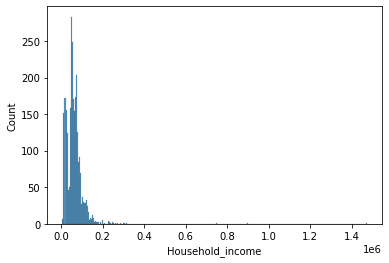

In [35]:
#Visualize distribution of income for subgroup identified.
sns.histplot(data= score_more_80_partisan_70_turn, x="Household_income")
plt.show()

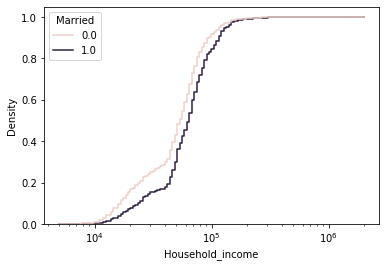

In [37]:
sns.histplot(
    data= potential_donors , x="Household_income", hue= "Married" ,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [48]:
#Impute with mean for target column with missing values, including 'Household_income'
#Create New data set where missing address and is potential_donors_fixed
potential_donors_fixed = potential_donors.fillna(potential_donors['Household_income'].mean())
potential_donors_fixed

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,101,Rural,64188.375806,M,0.0,0.000000,64188.375806,5370,6.000000,90000.000000,64188.375806,19.3,51.6,5.000000,7.000000,49.8,0,64188.375806
1,102,Suburban,1946.000000,F,1.0,1.000000,64188.375806,5151,10.000000,44000.000000,1.000000,69.4,91.8,8.000000,5.000000,2.4,1,15.000000
2,103,Suburban,1995.000000,64188.4,1.0,64188.375806,64188.375806,4144,64188.375806,64188.375806,1.000000,73.0,47.4,64188.375806,64188.375806,47.3,0,64188.375806
3,104,Suburban,1979.000000,64188.4,1.0,1.000000,64188.375806,4440,8.000000,62000.000000,1.000000,29.3,88.2,1.000000,7.000000,98.1,1,63.000000
4,105,Suburban,1947.000000,64188.4,0.0,1.000000,64188.375806,5064,64188.375806,47000.000000,1.000000,41.0,73.4,9.000000,64188.375806,75.0,0,64188.375806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20096,Suburban,1942.000000,M,1.0,1.000000,64188.375806,4310,10.000000,27000.000000,1.000000,10.3,22.4,10.000000,2.000000,67.9,0,64188.375806
19996,20097,Suburban,1981.000000,M,1.0,1.000000,64188.375806,5152,9.000000,53000.000000,1.000000,15.1,2.2,3.000000,4.000000,20.0,0,64188.375806
19997,20098,Rural,1917.000000,F,0.0,1.000000,64188.375806,3758,64188.375806,11000.000000,1.000000,23.8,1.6,11.000000,1.000000,78.9,0,64188.375806
19998,20099,Rural,1958.000000,F,0.0,64188.375806,64188.375806,4440,64188.375806,64188.375806,1.000000,31.4,38.6,64188.375806,64188.375806,39.5,0,64188.375806


In [49]:
#Check column 'Household_income'
potential_donors_fixed['Household_income'].value_counts().sort_values()

247000.000000       1
598000.000000       1
361000.000000       1
258000.000000       1
704000.000000       1
                 ... 
48000.000000      321
71000.000000      328
51000.000000      329
50000.000000      337
64188.375806     3087
Name: Household_income, Length: 289, dtype: int64

Question 3 (20 points)
It’s finally time to build a predictive model of donors. Luckily, BlueRoots has recently run a survey that reached approximately 3,000 of its members (see “Survey_Respondent” column), asking them some questions about their background and whether they’ve recently given a one-time gift to a progressive cause or non-profit that they are passionate about and, if so, how much they gave. The column with those survey responses is named “Liberal_cause_donation”. (People who gave $100 or more are listed as having given $100 in the data.) Using this data as a training set, your task is to build a model of BlueRoots’ members.
BlueRoots’ fundraising plan is to write to all of its members (despite your previous work) who your model predicts are likely to give $75 or more to a liberal cause. BlueRoots needs your help figuring out who those members are based on the survey it conducted.
As a first step in your model, you’ll need to select a set of variables for inclusion in the model. Write code to identify the set of variables that you will use to predict donation levels. Be sure to explain in your code comments why you are using the methods you are using to select variables for the model.
Save your commented code as Question3_LASTNAME, with the appropriate file extension (.R, .py). Be sure that your code is clearly commented.

In [55]:
#Note correlation across features
potential_donors.corr()

,voterID,Date_of_birth,Married,Homeowner,Has_children,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
voterID,1.000000,0.010600,0.004329,-0.010183,NaN,0.009412,-0.011681,NaN,0.004758,0.007260,-0.000108,-0.004971,0.002267,-0.556626,0.021535
Date_of_birth,0.010600,1.000000,-0.142417,-0.115644,NaN,-0.170227,0.167489,NaN,-0.231964,-0.382412,-0.211974,0.132063,0.081431,-0.119194,0.629914
Married,0.004329,-0.142417,1.000000,0.205819,NaN,-0.095046,0.123211,NaN,0.127947,0.341195,-0.197612,0.136633,-0.280500,0.104939,0.001293
Homeowner,-0.010183,-0.115644,0.205819,1.000000,NaN,-0.048373,0.082251,NaN,0.113447,0.185196,-0.114136,0.111729,-0.134167,0.046808,-0.056325
Has_children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modeled_charitable_giving,0.009412,-0.170227,-0.095046,-0.048373,NaN,1.000000,-0.579831,NaN,-0.070978,-0.059435,0.451392,-0.480901,0.084977,-0.021526,-0.172302
Household_income,-0.011681,0.167489,0.123211,0.082251,NaN,-0.579831,1.000000,NaN,0.027959,0.099785,-0.536943,0.526770,-0.126026,0.026868,0.152997
Unaffiliated_voter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modeled_activist_score,0.004758,-0.231964,0.127947,0.113447,NaN,-0.070978,0.027959,NaN,1.000000,0.531993,-0.040036,0.036406,0.072325,-0.007595,-0.354126
Modeled_turnout_score,0.007260,-0.382412,0.341195,0.185196,NaN,-0.059435,0.099785,NaN,0.531993,1.000000,-0.146777,0.164694,-0.188562,0.068493,-0.157244


In [57]:
potential_donors_numeric = potential_donors['Modeled_charitable_giving', 'Household_income','Date_of_birth']
sns.heatmap(potential_donors_numeric)

KeyError: ignored

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the missing value features and convert the DataFrame to a NumPy array
#Build prediction model
## Use “Liberal_cause_donation” =  'Household_income' + 'Homeowner' + 'Married' + 'Modeled_turnout_score' + 'Modeled_partisan_score' + 'Discretionary_income_level'


In [54]:
X = potential_donors[['Household_income','Homeowner', 'Married','Modeled_turnout_score','Modeled_partisan_score','Discretionary_income_level']

y = potential_donors['Liberal_cause_donation']

#Split the data into 70% train and aand 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,)

SyntaxError: ignored

In [ ]:
model = LinearRegression()

In [ ]:
#Fit the model
model.fit(x, y)

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

In [44]:
#How likely is it that potential donor will donate at least $75 too a liberal cause?
#Need the cdf
from scipy import stats
test=stats.ttest_1samp(potential_donors['Liberal_cause_donation'], 75)
print(test.pvalue.round(3))

nan


In [38]:
x_1 = potential_donors['Liberal_cause_donation']
ecdf = ECDF(x_1)
print(ecdf(75))

NameError: ignored

Analyst Note: Develop a Regression Model to predict who is likely to donate $75  or more to a liberal cause.

We will build a regression model and propose that the following independent variables will predict the target (dependent variable) 'Liberal_cause_donation' to see who is more likely to donate $75 or more to a liberal cause by calculating their coefficients and determining the bias term, or intercept. Divide the model data into training and test set by 80% of data to train our model, and use remaining 20% to test accuracy of model by checking if proposed model severely overfits the data.


 

In [ ]:
#Propose Independent variables to predict the target (dependent variable) of liberal cause donation: 'Liberal_cause_donation'.
 #Run correlation matrix to see which variables are highly correlated with one another.
 

Question 4 (30 points) Now build a simple model that predicts how much people will donate to a liberal cause (using “Liberal_cause_donation” as the outcome). This model does not need to be perfect, we understand that you don’t have much time. But show us in code the basic steps that you would use to build the model, including: how you would set up the data, how you would model the outcome, how you would evaluate model performance, how you would generate predictions for the rest of the membership list. Your approach should take into account the variables you selected in the previous question. For any steps you don’t have time to complete in the code (or just want to elaborate on), describe what you would do in words. Be as specific as you can. Lay out the exact steps you would take in this process, how you would organize the data, what analyses you would run at each step, and how you would get the data in final form to help the fundraising team with its donation request. Be sure to explain how you would evaluate the quality of your model. Write this section in as much technical detail as you can. You can use language directed to a technical audience, such as other analysts. Feel free to use pseudocode, reference specific software packages by name, etc. Save your commented code as Question4_LASTNAME, with the appropriate file extension (.R, .py). Add the written explanation to your document: GPTest_LASTNAME.



Question 5 (30 points) ● Great! Switching gears from model building, BlueRoots asks you to help them run a test to evaluate which types of fundraising messages increase donations the most. The BlueRoots team wants to test 3 different messages (A, B, and C) that its creative team has developed. BlueRoots plans to send the messages by mail and email. ● Describe how you would advise BlueRoots to design and execute this test (no coding needed, just explain in writing). In particular, be sure to address: ○ How would you decide on the size of the test and each group? ○ How would you decide who gets which message? ○ How would you make sure that BlueRoots implements the design correctly? ● Describe how you would analyze the test (no coding needed, just explain in writing). In particular, be sure to address: ○ What outcomes would you be looking at? ○ How would you know if any findings were likely due to chance or not? ○ How would you test if the effect of a given message is different for different groups, like men vs women? ● Write this section in as much technical detail as you can. You can use language directed to a technical audience, such as other analysts. Feel free to use pseudocode, reference specific software packages by name, etc. ● Add this written explanation to your document for BlueRoots, GPTest_LASTNAME.

#Analyst Note Recommendation for Evaluation: We could import either Scipy or Statsmodel libraries to calculate the test-statistics in parametric testing of our A group (men) versus B group (women). Gender is one level of testing across comparison groups. However, we may also want to test how the audience receives a new message, thus resulting in two separate groups before and after: 1) Men before message, 2) same Men after message, 3) Women before same message, measured against 4) same Women after same message. We will be controlling for the message. 